In [67]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas_profiling
import scipy.stats as stats
%matplotlib inline

In [121]:
data = pd.read_excel('F:\\Analytix\\Git\\Analytix\\Projects\\1. Predicting Credit Card Spend & Identifying Key Drivers\\Data Set.xlsx')
data.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,...,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,...,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,...,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3.0,0,23,2,May,16,3,2,...,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2.0,0,26,3,July,16,3,2,...,1,0,1,0,1,0,0,0,1,0


In [30]:
data = pd.read_excel('C:\\Analytix\\Git\\Analytix\\Projects\\1. Predicting Credit Card Spend & Identifying Key Drivers\\Data Set.xlsx')
data.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,...,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,...,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,...,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3.0,0,23,2,May,16,3,2,...,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2.0,0,26,3,July,16,3,2,...,1,0,1,0,1,0,0,0,1,0


In [122]:
data.info(max_cols=130)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 130 columns):
custid               5000 non-null object
region               5000 non-null int64
townsize             4998 non-null float64
gender               5000 non-null int64
age                  5000 non-null int64
agecat               5000 non-null int64
birthmonth           5000 non-null object
ed                   5000 non-null int64
edcat                5000 non-null int64
jobcat               5000 non-null int64
union                5000 non-null int64
employ               5000 non-null int64
empcat               5000 non-null int64
retire               5000 non-null int64
income               5000 non-null int64
lninc                5000 non-null float64
inccat               5000 non-null int64
debtinc              5000 non-null float64
creddebt             5000 non-null float64
lncreddebt           4999 non-null float64
othdebt              5000 non-null float64
lnothdebt        

## 1. Create the dependent variable : TotalSpend

In [123]:
data['TotalSpend'] = data['cardspent'] + data['card2spent']
data = data.drop(columns=['cardspent','card2spent'])

In [124]:
data.info(max_cols=131)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 129 columns):
custid               5000 non-null object
region               5000 non-null int64
townsize             4998 non-null float64
gender               5000 non-null int64
age                  5000 non-null int64
agecat               5000 non-null int64
birthmonth           5000 non-null object
ed                   5000 non-null int64
edcat                5000 non-null int64
jobcat               5000 non-null int64
union                5000 non-null int64
employ               5000 non-null int64
empcat               5000 non-null int64
retire               5000 non-null int64
income               5000 non-null int64
lninc                5000 non-null float64
inccat               5000 non-null int64
debtinc              5000 non-null float64
creddebt             5000 non-null float64
lncreddebt           4999 non-null float64
othdebt              5000 non-null float64
lnothdebt        

Check whether the data y variable is following Normal Distribution.

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


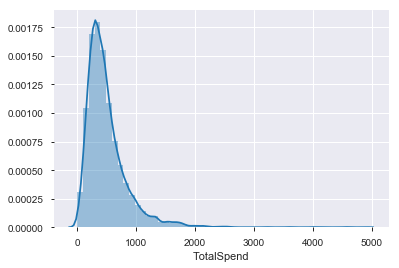

In [125]:
sns.distplot(data.TotalSpend)
plt.show()

Apply log-transformation to y variable

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


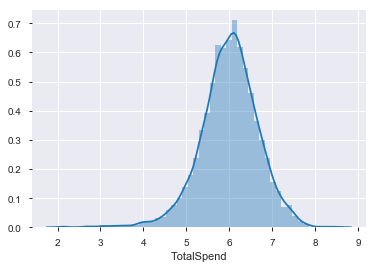

In [126]:
sns.distplot(np.log(data.TotalSpend))
plt.show()

The Log Transformation is making the distribution normal.

In [127]:
data['TotalSpend'] = np.log(data['TotalSpend'])

## 2. Data Cleaning

In [128]:
data = data.drop(columns=['agecat',
                          'edcat',
                          'empcat',
                          'inccat',
                          'spousedcat',
                          'addresscat',
                          'cardtenurecat',
                          'card2tenurecat',
                          'lninc',
                          'lncreddebt',
                          'lnothdebt',
                          'lnlongmon',
                          'lnlongten',
                          'lntollmon',
                          'lntollten',
                          'lnequipmon',
                          'lnequipten',
                          'lncardmon',
                          'lncardten',
                          'lnwiremon',
                          'lnwireten',
                          'custid',
                          'card2tenure',
                          'longten'
                         ])

In [129]:
# Report = pandas_profiling.ProfileReport(data)
# Report.to_file(outputfile='Report.html')

In [130]:
data.info(max_cols=109)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 105 columns):
region               5000 non-null int64
townsize             4998 non-null float64
gender               5000 non-null int64
age                  5000 non-null int64
birthmonth           5000 non-null object
ed                   5000 non-null int64
jobcat               5000 non-null int64
union                5000 non-null int64
employ               5000 non-null int64
retire               5000 non-null int64
income               5000 non-null int64
debtinc              5000 non-null float64
creddebt             5000 non-null float64
othdebt              5000 non-null float64
default              5000 non-null int64
jobsat               5000 non-null int64
marital              5000 non-null int64
spoused              5000 non-null int64
reside               5000 non-null int64
pets                 5000 non-null int64
pets_cats            5000 non-null int64
pets_dogs            5

In [131]:
nominal_cat_vars = ['region',
'townsize',
'birthmonth',
'jobcat',
'default',
'hometype',
'carown',
'cartype',
'carcatvalue',
'carbought',
'commute',
'commutecat',
'reason',
'polview',
'card',
'cardtype',
'cardbenefit',
'card2',
'card2type',
'card2benefit',
'internet',
'gender',
'union',
'retire',
'marital',
'homeown',
'carbuy',
'commutecar',
'commutemotorcycle',
'commutecarpool',
'commutebus',
'commuterail',
'commutepublic',
'commutebike',
'commutewalk',
'commutenonmotor',
'telecommute',
'polparty',
'polcontrib',
'vote',
'cardfee',
'card2fee',
'active',
'bfast',
'churn',
'tollfree',
'equip',
'callcard',
'wireless',
'multline',
'voice',
'pager',
'callid',
'callwait',
'forward',
'confer',
'ebill',
'owntv',
'ownvcr',
'owndvd',
'owncd',
'ownpda',
'ownpc',
'ownipod',
'owngame',
'ownfax',
'news',
'response_01',
'response_02',
'response_03']

In [132]:
ordinal_cat_vars = ['jobsat']

In [133]:
numeric_vars = ['age',
               'ed',
               'employ',
               'income',
               'debtinc',
               'creddebt',
               'othdebt',
               'spoused',
               'reside',
               'pets',
               'pets_cats',
               'pets_dogs',
               'pets_birds',
               'pets_reptiles',
               'pets_small',
               'pets_saltfish',
               'pets_freshfish',
               'address',
               'cars',
               'carvalue',
               'commutetime',
               'cardtenure',
               'tenure',
               'longmon',
               'tollmon',
               'tollten',
               'equipmon',
               'equipten',
               'cardmon',
               'cardten',
               'wiremon',
               'wireten',
               'hourstv',
               'TotalSpend']

In [134]:
cat_vars = nominal_cat_vars + ordinal_cat_vars
num_vars = numeric_vars

In [135]:
data_cat = data[cat_vars]
data_num = data[num_vars]

In [136]:
data_cat.head()

,region,townsize,birthmonth,jobcat,default,hometype,carown,cartype,carcatvalue,carbought,...,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,jobsat
0,1,2.0,September,1,1,2,1,0,1,0,...,0,0,1,1,0,0,0,1,0,1
1,5,5.0,May,2,1,3,1,1,1,0,...,1,1,1,1,1,1,0,0,0,1
2,3,4.0,June,2,0,1,1,1,1,0,...,0,0,0,0,0,1,0,0,0,4
3,4,3.0,May,2,1,3,1,1,1,0,...,0,1,1,1,0,1,1,0,0,2
4,2,2.0,July,2,0,2,0,1,1,0,...,0,1,0,1,0,0,0,1,0,1


In [137]:
data_num.head()

,age,ed,employ,income,debtinc,creddebt,othdebt,spoused,reside,pets,...,tollmon,tollten,equipmon,equipten,cardmon,cardten,wiremon,wireten,hourstv,TotalSpend
0,20,15,0,31,11.1,1.200909,2.240091,-1,3,0,...,29.0,161.05,29.50,126.1,14.25,60.0,0.00,0.00,13,5.007029
1,22,17,0,15,18.6,1.222020,1.567980,-1,2,6,...,0.0,0.00,54.85,1975.0,16.00,610.0,45.65,1683.55,18,4.350794
2,67,14,16,35,9.9,0.928620,2.536380,13,3,3,...,0.0,0.00,0.00,0.0,23.00,1410.0,0.00,0.00,21,5.886021
3,23,16,0,20,5.7,0.022800,1.117200,18,5,0,...,0.0,0.00,0.00,0.0,21.00,685.0,0.00,0.00,26,5.884464
4,26,16,1,23,1.7,0.214659,0.176341,13,4,0,...,16.5,387.70,0.00,0.0,17.25,360.0,19.05,410.80,27,6.230147


In [138]:
data_num.spoused.value_counts()

-1     2599
 13     270
 14     267
 15     257
 12     252
 16     250
 11     233
 17     188
 10     141
 18     116
 9      107
 19      90
 8       70
 20      59
 7       36
 21      20
 6       14
 22      14
 23       9
 5        4
 24       3
 3        1
Name: spoused, dtype: int64

In [139]:
data = data.drop(columns=['spoused'])
data_num = data_num.drop(columns=['spoused'])
data_num.head()

,age,ed,employ,income,debtinc,creddebt,othdebt,reside,pets,pets_cats,...,tollmon,tollten,equipmon,equipten,cardmon,cardten,wiremon,wireten,hourstv,TotalSpend
0,20,15,0,31,11.1,1.200909,2.240091,3,0,0,...,29.0,161.05,29.50,126.1,14.25,60.0,0.00,0.00,13,5.007029
1,22,17,0,15,18.6,1.222020,1.567980,2,6,0,...,0.0,0.00,54.85,1975.0,16.00,610.0,45.65,1683.55,18,4.350794
2,67,14,16,35,9.9,0.928620,2.536380,3,3,2,...,0.0,0.00,0.00,0.0,23.00,1410.0,0.00,0.00,21,5.886021
3,23,16,0,20,5.7,0.022800,1.117200,5,0,0,...,0.0,0.00,0.00,0.0,21.00,685.0,0.00,0.00,26,5.884464
4,26,16,1,23,1.7,0.214659,0.176341,4,0,0,...,16.5,387.70,0.00,0.0,17.25,360.0,19.05,410.80,27,6.230147


Outlier Treatment

In [140]:
def OutlierRemover(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

In [141]:
data_num.describe()

,age,ed,employ,income,debtinc,creddebt,othdebt,reside,pets,pets_cats,...,tollmon,tollten,equipmon,equipten,cardmon,cardten,wiremon,wireten,hourstv,TotalSpend
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4998.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,47.025600,14.543000,9.730400,54.759600,9.954160,1.857326,3.654460,2.204000,3.067400,0.500400,...,13.264450,577.832510,12.991310,470.176400,15.443850,720.478391,10.701190,421.984610,19.645000,6.001244
std,17.770338,3.281083,9.690929,55.377511,6.399783,3.415732,5.395172,1.393977,3.414497,0.860783,...,16.310018,949.151586,19.212943,912.220624,15.007569,922.225527,19.799837,1001.003287,5.165609,0.671473
min,18.000000,6.000000,0.000000,9.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.093098
25%,31.000000,12.000000,2.000000,24.000000,5.100000,0.385520,0.980301,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.621424
50%,47.000000,14.000000,7.000000,38.000000,8.800000,0.926437,2.098540,2.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,13.750000,425.000000,0.000000,0.000000,20.000000,6.026470
75%,62.000000,17.000000,15.000000,67.000000,13.600000,2.063820,4.314780,3.000000,5.000000,1.000000,...,24.500000,885.450000,30.800000,510.162500,22.750000,1080.000000,20.962500,89.962500,23.000000,6.422536
max,79.000000,23.000000,52.000000,1073.000000,43.100000,109.072596,141.459150,9.000000,21.000000,6.000000,...,173.000000,6923.450000,106.300000,6525.300000,188.500000,13705.000000,186.250000,12858.650000,36.000000,8.493116


In [142]:
data_num = data_num.apply(lambda x: OutlierRemover(x))
data_num.describe()

,age,ed,employ,income,debtinc,creddebt,othdebt,reside,pets,pets_cats,...,tollmon,tollten,equipmon,equipten,cardmon,cardten,wiremon,wireten,hourstv,TotalSpend
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4998.000000,5000.00000,5000.000000,5000.00000,5000.000000
mean,47.025600,14.544200,9.698000,53.629900,9.914120,1.758369,3.522506,2.194200,3.049200,0.490400,...,13.140075,570.130195,12.908715,463.398395,15.266950,707.239096,10.53027,409.960020,19.62660,6.004727
std,17.770338,3.242553,9.581689,46.567698,6.241691,2.380681,4.221760,1.361491,3.351213,0.822462,...,15.811442,914.744043,18.955975,882.832804,14.156339,848.339901,19.02128,930.007398,5.11922,0.644973
min,18.000000,8.000000,0.000000,9.000000,0.700000,0.033160,0.114299,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,4.063844
25%,31.000000,12.000000,2.000000,24.000000,5.100000,0.385520,0.980301,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,17.00000,5.621424
50%,47.000000,14.000000,7.000000,38.000000,8.800000,0.926437,2.098540,2.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,13.750000,425.000000,0.00000,0.000000,20.00000,6.026470
75%,62.000000,17.000000,15.000000,67.000000,13.600000,2.063820,4.314780,3.000000,5.000000,1.000000,...,24.500000,885.450000,30.800000,510.162500,22.750000,1080.000000,20.96250,89.962500,23.00000,6.422536
max,79.000000,21.000000,39.000000,272.010000,29.200000,14.280358,24.064260,6.000000,13.000000,3.000000,...,58.752500,3977.270500,63.300500,3679.457500,64.250000,4011.200000,78.30400,4530.186000,31.00000,7.473127


Missing Value Treatment

In [143]:
def MissingTreatment(x):
    x = x.fillna(x.mean())
    return x

In [144]:
def MissingTreatmentCategorical(x):
    x = x.fillna(x.mode())
    return x

In [145]:
data_num = data_num.apply(lambda x: MissingTreatment(x))
data_num.info(max_cols=100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 33 columns):
age               5000 non-null float64
ed                5000 non-null float64
employ            5000 non-null float64
income            5000 non-null float64
debtinc           5000 non-null float64
creddebt          5000 non-null float64
othdebt           5000 non-null float64
reside            5000 non-null float64
pets              5000 non-null float64
pets_cats         5000 non-null float64
pets_dogs         5000 non-null float64
pets_birds        5000 non-null float64
pets_reptiles     5000 non-null float64
pets_small        5000 non-null float64
pets_saltfish     5000 non-null float64
pets_freshfish    5000 non-null float64
address           5000 non-null float64
cars              5000 non-null float64
carvalue          5000 non-null float64
commutetime       5000 non-null float64
cardtenure        5000 non-null float64
tenure            5000 non-null float64
longmon      

In [149]:
data_cat = data_cat.apply(lambda x: MissingTreatmentCategorical(x))

In [152]:
corrm = data_num.corr()
corrm.to_csv('corr.csv')

F-Test

In [ ]:
anova_df = pd.DataFrame()
for var in data_cat.columns:
    df = pd.DataFrame()
    df['Feature'] = var
    df['F_value'] = stats.f_oneway(data_cat[var],data_num.TotalSpend)

In [156]:
data_cat.head()

,region,townsize,birthmonth,jobcat,default,hometype,carown,cartype,carcatvalue,carbought,...,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,jobsat
0,1,2.0,September,1,1,2,1,0,1,0,...,0,0,1,1,0,0,0,1,0,1
1,5,5.0,May,2,1,3,1,1,1,0,...,1,1,1,1,1,1,0,0,0,1
2,3,4.0,June,2,0,1,1,1,1,0,...,0,0,0,0,0,1,0,0,0,4
3,4,3.0,May,2,1,3,1,1,1,0,...,0,1,1,1,0,1,1,0,0,2
4,2,2.0,July,2,0,2,0,1,1,0,...,0,1,0,1,0,0,0,1,0,1


In [165]:
data_cat['TotalSpend'] = data['TotalSpend']
default_0 = data_cat.TotalSpend[data_cat['default'] == 0]
default_1 = data_cat.TotalSpend[data_cat['default'] == 1]

stats.f_oneway(default_0,default_1)

F_onewayResult(statistic=2.3710963728620347, pvalue=0.12366352313806013)

In [174]:
data_cat.birthmonth.value_counts().index[1]

'May'

In [176]:
data_cat.birthmonth.value_counts().shape[0]

12

In [ ]:
for col in data_cat.columns:
    

# Wrong Attempt

In [11]:
numeric_vars = [key for key in dict(data.dtypes) if (data.dtypes)[key] in ['float32','float64','int32','int64']]
cat_vars = [key for key in dict(data.dtypes) if (data.dtypes)[key] in ['object']]
print(numeric_vars)
print(cat_vars)

['region', 'townsize', 'gender', 'age', 'ed', 'jobcat', 'union', 'employ', 'retire', 'income', 'debtinc', 'creddebt', 'othdebt', 'default', 'jobsat', 'marital', 'spoused', 'reside', 'pets', 'pets_cats', 'pets_dogs', 'pets_birds', 'pets_reptiles', 'pets_small', 'pets_saltfish', 'pets_freshfish', 'homeown', 'hometype', 'address', 'cars', 'carown', 'cartype', 'carvalue', 'carcatvalue', 'carbought', 'carbuy', 'commute', 'commutecat', 'commutetime', 'commutecar', 'commutemotorcycle', 'commutecarpool', 'commutebus', 'commuterail', 'commutepublic', 'commutebike', 'commutewalk', 'commutenonmotor', 'telecommute', 'reason', 'polview', 'polparty', 'polcontrib', 'vote', 'card', 'cardtype', 'cardbenefit', 'cardfee', 'cardtenure', 'card2', 'card2type', 'card2benefit', 'card2fee', 'active', 'bfast', 'tenure', 'churn', 'longmon', 'tollfree', 'tollmon', 'tollten', 'equip', 'equipmon', 'equipten', 'callcard', 'cardmon', 'cardten', 'wireless', 'wiremon', 'wireten', 'multline', 'voice', 'pager', 'internet

In [13]:
data_num = data[numeric_vars]
data_cat = data[cat_vars]

In [14]:
data_num.head()

,region,townsize,gender,age,ed,jobcat,union,employ,retire,income,...,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,TotalSpend
0,1,2.0,1,20,15,1,1,0,0,31,...,0,0,1,1,0,0,0,1,0,5.007029
1,5,5.0,0,22,17,2,0,0,0,15,...,1,1,1,1,1,1,0,0,0,4.350794
2,3,4.0,1,67,14,2,0,16,0,35,...,0,0,0,0,0,1,0,0,0,5.886021
3,4,3.0,0,23,16,2,0,0,0,20,...,0,1,1,1,0,1,1,0,0,5.884464
4,2,2.0,0,26,16,2,0,1,0,23,...,0,1,0,1,0,0,0,1,0,6.230147


In [15]:
data_cat.head()

,birthmonth
0,September
1,May
2,June
3,May
4,July


### Outlier Treatment

In [16]:
def OutlierRemover(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

In [17]:
data_num = data_num.apply(OutlierRemover)

### Missing Value Treatment

In [18]:
def MissingTreatment(x):
    x = x.fillna(x.median())
    return x

In [19]:
def MissingTreatmentCategorical(x):
    x = x.fillna(x.mode())
    return x

In [20]:
data_num = data_num.apply(MissingTreatment)
data_cat = data_cat.apply(MissingTreatmentCategorical)
print("")

There are no variables with very less variance.

In [21]:
data_new = pd.concat([data_num,data_cat],axis=1)
data_new.head()

,region,townsize,gender,age,ed,jobcat,union,employ,retire,income,...,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,TotalSpend,birthmonth
0,1.0,2.0,1.0,20.0,15.0,1.0,1.0,0.0,0.0,31.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,5.007029,September
1,5.0,5.0,0.0,22.0,17.0,2.0,0.0,0.0,0.0,15.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,4.350794,May
2,3.0,4.0,1.0,67.0,14.0,2.0,0.0,16.0,0.0,35.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.886021,June
3,4.0,3.0,0.0,23.0,16.0,2.0,0.0,0.0,0.0,20.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,5.884464,May
4,2.0,2.0,0.0,26.0,16.0,2.0,0.0,1.0,0.0,23.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,6.230147,July


Creating Dummy variables for categorical data

In [22]:
def CreateDummyVariables(colname, df):
    dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df,dummies],axis=1)
    df.drop(colname,axis=1,inplace=True)
    return df

In [23]:
data_cat_new = data_cat
for col in data_cat_new:
    data_cat_new[col] = data_cat_new[col].astype('category')
    data_cat_new = CreateDummyVariables(col,data_cat_new)

In [24]:
data_new = pd.concat([data_num,data_cat_new],axis=1)
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 115 entries, region to birthmonth_September
dtypes: float64(104), uint8(11)
memory usage: 4.0 MB


## Correlation Metrics

In [25]:
corrm = data_new.corr()
corrm.to_csv('corr.csv')

In [26]:
features = data_new[data_new.columns.difference(['TotalSpend'])]
target = data_new['TotalSpend']

Based on the correlation matrix, selecting the following by excluding variables with correlation value between (-0.1,0.1).

### RFE (Recursive Feature Elimination)

In [27]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
rfe = RFE(lm,n_features_to_select=20)
rfe = rfe.fit(features,target)

In [28]:
RFE_columns = features.columns[rfe.get_support()]
RFE_columns
for i in RFE_columns:
    print(i)

birthmonth_December
birthmonth_February
carbought
carcatvalue
card
card2
carown
cartype
commutenonmotor
gender
owncd
owndvd
ownfax
owntv
ownvcr
pets_reptiles
response_03
retire
voice
wireless


### Select K-Best

In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [30]:
skb = SelectKBest(f_regression,k=20)
skb = skb.fit(features,target)

In [31]:
SKB_columns = features.columns[skb.get_support()]
SKB_columns
for i in SKB_columns:
    print(i)

carcatvalue
card
card2
carown
carvalue
creddebt
ed
equipten
gender
income
othdebt
owncd
owndvd
owntv
ownvcr
retire
tollmon
tollten
wiremon
wireten


### F-Regression

In [32]:
from sklearn.feature_selection import f_regression
import itertools

In [33]:
F_values,p_values = f_regression(features,target)

In [34]:
f_tuple = [(x,y,z) for x,y,z in itertools.zip_longest(features.columns,F_values,('%.3f' %p for p in p_values))]
f_Result = pd.DataFrame(f_tuple,columns=['feature','F_value','p_value']).sort_values(by='p_value')
f_Result['p_value'] = f_Result['p_value'].apply(lambda x: float(x))
final_f = f_Result[f_Result['p_value'] == 0.00].sort_values(by='F_value',ascending=False).iloc[:20]
for i in final_f.iterrows():
    print(i[1]['feature'])

income
carvalue
othdebt
card
creddebt
carcatvalue
retire
owndvd
ownvcr
owncd
ed
wireten
wiremon
tollten
owntv
equipten
gender
card2
tollmon
carown


In [35]:
final_f

,feature,F_value,p_value
64,income,724.662079,0.0
35,carvalue,519.265491,0.0
72,othdebt,363.647212,0.0
21,card,298.331858,0.0
50,creddebt,287.876986,0.0
20,carcatvalue,223.075088,0.0
100,retire,204.476977,0.0
74,owndvd,138.282716,0.0
81,ownvcr,125.995381,0.0
73,owncd,111.383648,0.0


### VIF

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [37]:
my_formula = 'TotalSpend ~ card+retire+ownvcr+creddebt+birthmonth_December+birthmonth_February+card2+cartype+commutenonmotor+gender+owntv+pets_reptiles+response_03+ed+tollmon'

In [38]:
y, X = dmatrices(formula_like=my_formula, data=data_new, return_type='dataframe')

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['feature'] = X.columns
vif = vif.round(2).sort_values(by='VIF Factor',ascending=False)
vif.reset_index()

,index,VIF Factor,feature
0,0,108.58,Intercept
1,7,1.19,card2
2,1,1.18,card
3,3,1.17,ownvcr
4,11,1.17,owntv
5,2,1.08,retire
6,4,1.07,creddebt
7,14,1.05,ed
8,15,1.03,tollmon
9,13,1.02,response_03


In [39]:
for i in vif.iterrows():
    print(i[1]['feature'])

Intercept
card2
card
ownvcr
owntv
retire
creddebt
ed
tollmon
response_03
birthmonth_December
birthmonth_February
gender
cartype
commutenonmotor
pets_reptiles


In [40]:
my_formula = 'TotalSpend ~ card+retire+ownvcr+creddebt+birthmonth_December+birthmonth_February+card2+cartype+commutenonmotor+gender+owntv+pets_reptiles+response_03+ed+tollmon+wiremon+carvalue+tollten+carcatvalue+wireten+income+wireless+carown+othdebt+voice+owncd+owndvd+carbought+ownfax+equipten'

In [41]:
# get y and X dataframes based on this regression
y, X = dmatrices(my_formula, data_new, return_type='dataframe')

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif.round(2).sort_values(by='VIF Factor',ascending=False)

,VIF Factor,features
0,114.98,Intercept
16,18.31,wiremon
17,11.79,carvalue
20,8.43,wireten
19,7.96,carcatvalue
18,7.81,tollten
22,7.32,wireless
15,7.18,tollmon
21,6.42,income
23,2.81,carown


In [42]:
featurelist = ['card2','card','ownvcr','owntv','retire','creddebt','ed','tollmon','response_03','birthmonth_December','birthmonth_February',
              'gender','cartype','commutenonmotor','pets_reptiles']

In [43]:
numfeaturelist = ['card2','card','creddebt','ed','tollmon']

In [44]:
data_new[numfeaturelist].head()

,card2,card,creddebt,ed,tollmon
0,5.0,3.0,1.200909,15.0,29.0
1,4.0,2.0,1.222020,17.0,0.0
2,4.0,2.0,0.928620,14.0,0.0
3,3.0,2.0,0.033160,16.0,0.0
4,1.0,4.0,0.214659,16.0,16.5


In [45]:
data_new[numfeaturelist].columns

Index(['card2', 'card', 'creddebt', 'ed', 'tollmon'], dtype='object')

In [46]:
def TransformVariables(x):
    print("Variable: {}".format(x))
    print("Correlation for log transformation: {}".format(np.corrcoef(np.log(features[x] + 1),target)[0][1]))
    print("Correlation for exp transformation: {}".format(np.corrcoef(np.exp(features[x]),target)[0][1]))
    print("Correlation for square transformation: {}".format(np.corrcoef(np.square(features[x]),target)[0][1]))
    print("Correlation for squareroot transformation: {}".format(np.corrcoef(np.sqrt(features[x]),target)[0][1]))
    print("")

In [47]:
for var in numfeaturelist:
    TransformVariables(var)

Variable: card2
Correlation for log transformation: -0.09744373153001418
Correlation for exp transformation: -0.04024603260075786
Correlation for square transformation: -0.05345030306435974
Correlation for squareroot transformation: -0.09210198526152691

Variable: card
Correlation for log transformation: -0.2717050466192817
Correlation for exp transformation: -0.1252131104346197
Correlation for square transformation: -0.1891667276634213
Correlation for squareroot transformation: -0.2629608543803974

Variable: creddebt
Correlation for log transformation: 0.260235065600527
Correlation for exp transformation: 0.09963969542368724
Correlation for square transformation: 0.17600306131006085
Correlation for squareroot transformation: 0.25836032314077456

Variable: ed
Correlation for log transformation: 0.09718744491444012
Correlation for exp transformation: 0.05607838038599583
Correlation for square transformation: 0.09724315782656211
Correlation for squareroot transformation: 0.09781384111627

In [48]:
data_final = data_new[featurelist]
data_final['TotalSpend'] = data_new['TotalSpend']
data_final['card2'] = np.log(data_new['card2'] + 1)
data_final['card'] = np.log(data_new['card'] + 1)
data_final['creddebt'] = np.log(data_new['creddebt'] + 1)
data_final['ed'] = np.sqrt(data_new['ed'])
data_final['tollmon'] = np.square(data_new['tollmon'])
data_final.head()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

,card2,card,ownvcr,owntv,retire,creddebt,ed,tollmon,response_03,birthmonth_December,birthmonth_February,gender,cartype,commutenonmotor,pets_reptiles,TotalSpend
0,1.791759,1.386294,1.0,1.0,0.0,0.788870,3.872983,841.00,0.0,0,0,1.0,0.0,0.0,0.0,5.007029
1,1.609438,1.098612,1.0,1.0,0.0,0.798417,4.123106,0.00,0.0,0,0,0.0,1.0,1.0,0.0,4.350794
2,1.609438,1.098612,1.0,1.0,0.0,0.656805,3.741657,0.00,0.0,0,0,1.0,1.0,0.0,0.0,5.886021
3,1.386294,1.098612,1.0,1.0,0.0,0.032622,4.000000,0.00,0.0,0,0,0.0,1.0,0.0,0.0,5.884464
4,0.693147,1.609438,1.0,1.0,0.0,0.194463,4.000000,272.25,0.0,0,0,0.0,1.0,0.0,0.0,6.230147


In [49]:
import sklearn.metrics as metrics

## Modelling

Split data into train and test

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
train,test = train_test_split(data_final,test_size=0.3,random_state=123)

In [52]:
len(test)

1500

In [53]:
len(train)

3500

In [54]:
train_X = train[train.columns.difference(['TotalSpend'])]
test_X = test[test.columns.difference(['TotalSpend'])]
train_y = train['TotalSpend']
test_y = test['TotalSpend']

In [63]:
train_X

,birthmonth_December,birthmonth_February,card,card2,cartype,commutenonmotor,creddebt,ed,gender,owntv,ownvcr,pets_reptiles,response_03,retire,tollmon
4036,0,0,0.693147,1.098612,0.0,0.0,1.160334,4.123106,1.0,1.0,1.0,0.0,0.0,1.0,0.000000
2883,0,0,1.098612,1.609438,1.0,0.0,1.108409,4.000000,1.0,1.0,1.0,0.0,0.0,0.0,0.000000
4162,0,0,1.609438,1.098612,0.0,0.0,0.213655,4.123106,0.0,1.0,1.0,0.0,0.0,0.0,729.000000
4640,1,0,1.098612,1.791759,0.0,0.0,0.722388,3.162278,0.0,1.0,1.0,0.0,0.0,0.0,289.000000
2430,0,0,1.609438,0.693147,0.0,0.0,1.535652,4.582576,0.0,1.0,1.0,0.0,0.0,0.0,576.000000
449,0,0,1.609438,1.098612,0.0,1.0,2.477292,3.741657,0.0,1.0,1.0,1.0,0.0,0.0,1540.562500
4179,0,0,0.693147,1.386294,0.0,0.0,0.657644,3.605551,0.0,1.0,1.0,0.0,0.0,0.0,0.000000
4763,0,0,1.386294,1.609438,0.0,0.0,1.090835,4.242641,1.0,1.0,1.0,0.0,0.0,0.0,1072.562500
749,0,0,1.386294,1.609438,0.0,0.0,1.347625,3.872983,0.0,1.0,1.0,0.0,0.0,0.0,0.000000
2525,0,0,1.609438,0.693147,1.0,0.0,0.296678,4.582576,0.0,1.0,1.0,0.0,1.0,0.0,0.000000


In [64]:
train_y

4036    6.504498
2883    5.203072
4162    5.391534
4640    6.214628
2430    7.473127
449     7.082876
4179    5.504762
4763    6.030733
749     5.879191
2525    5.702081
275     5.738248
1090    5.848864
3417    6.265206
2396    5.457882
3438    5.877988
509     6.743953
4423    6.072584
1004    5.698200
171     6.386273
4978    4.332442
1995    5.968912
354     5.090432
2787    6.308335
746     5.771628
4498    5.881650
1820    5.959613
2086    6.552864
735     5.812039
1405    4.932962
3528    6.561186
          ...   
4958    5.953087
3702    6.831716
4309    5.270484
3937    6.152988
1382    5.789471
3252    5.726620
2428    4.918520
4195    7.085089
1897    5.440468
1159    5.021443
4997    7.331551
39      6.084636
2050    6.140983
4547    5.571584
1847    5.793836
1092    5.767039
3325    5.288570
2894    6.499622
1363    6.019712
3481    5.540871
111     6.284339
942     5.432192
4169    6.165607
4143    5.934497
96      6.878172
1593    5.333636
4060    5.176206
1346    6.3418

# Model 1: Decision Tree

In [55]:
from sklearn.tree import DecisionTreeRegressor

In [56]:
from sklearn.grid_search import GridSearchCV

C:\Users\User\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [59]:
parameters = {"min_samples_split": [10, 20, 40],
              "max_depth": [2,4, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }

In [60]:
gscv_dtr = GridSearchCV(DecisionTreeRegressor(),
                       param_grid=parameters,
                       cv=5)
gscv_dtr.fit(train_X,train_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [10, 20, 40], 'max_depth': [2, 4, 6, 8], 'min_samples_leaf': [20, 40, 100], 'max_leaf_nodes': [5, 20, 100]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [61]:
gscv_dtr.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=100, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=40,
           min_samples_split=40, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [62]:
gscv_dtr.best_score_

0.23857457629149542

In [65]:
gscv_dtr.predict(train_X)

array([6.49265213, 5.8613569 , 5.75635218, ..., 6.01043604, 6.01043604,
       5.8613569 ])

In [ ]:
treereg = DecisionTreeRegressor(max_depth=10,random_state=1)
treereg.fit(train_X,train_y)

In [ ]:
from sklearn.tree import export_graphviz

In [ ]:
export_graphviz(treereg, out_file='tree_vehicles.dot', feature_names=train_X.columns)

In [ ]:
from graphviz import Source

In [ ]:
treereg.predict(train_X)

In [ ]:
train['pred'] = (treereg.predict(train_X))
train[['TotalSpend','pred']].head(10)

In [ ]:
test['pred'] = treereg.predict(test_X)
test[['TotalSpend','pred']].head(10)

In [ ]:
MAPE_train = np.mean(np.abs(train.TotalSpend - train.pred)/train.TotalSpend)
MAPE_test = np.mean(np.abs(test.TotalSpend - test.pred)/test.TotalSpend)
RMSE_train = metrics.mean_squared_error(train.TotalSpend , train.pred)
RMSE_test = metrics.mean_squared_error(test.TotalSpend , test.pred)
print("MAPE_train: {}".format(MAPE_train))
print("MAPE_test: {}".format(MAPE_test))
print("RMSE_train: {}".format(RMSE_train))
print("RMSE_test: {}".format(RMSE_test))